# **Práctica 1: Análisis exploratorio de datos**

Nombre:

No. Cuenta:

Email:

### **Contexto**

El sector inmobiliario de Melbourne, Australia continúa en auge desde hace algunos años. 
Es de interés conocer la tendencia inmobiliaria en dicha ciudad debido a que cada vez es más difícil adquirir una unidad de 2 dormitorios a un precio razonable.

**Objetivo:** Encontrar información de interés para predecir la próxima tendencia inmobiliaria en Melbourne.


**Fuente de datos**

* 1) Rooms: Número de habitaciones.
* 2) Price: Precio en dolares.
* 3) Method: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad transferida; PN - vendida antes no revelada; SN - vendida no revelada; NB - sin oferta; VB - oferta del proveedor; W - retirada antes de la subasta; SA - vendida después de subasta; SS - vendida después del precio de subasta no revelado. N/A - precio u oferta más alta no disponible.
* 4) Type: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site – en desarrollo; o res - otro residencial.
* 5) SellerG: Agente de bienes raíces.
* 6) Date: Fecha de venta.
* 7) Distance: Distancia del CBD (Centro de negocios).
* 8) Regionname: Región general (oeste, noroeste, norte, noreste ...).
* 9) Propertycount: Número de propiedades que existen en el suburbio.
* 10) Bedroom2: Número de dormitorios (de otra fuente).
* 11) Bathroom: Cantidad de baños.
* 12) Car: Número de estacionamientos.
* 13) Landsize: Tamaño del terreno.
* 14) BuildingArea: Tamaño del edificio.
* 15) CouncilArea: Consejo de gobierno de la zona (Municipio).


### **Importar las bibliotecas y los datos**

In [3]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline                
# Para generar y almacenar los gráficos dentro del cuaderno

In [4]:
DatosMelbourne = pd.read_csv("Datos/melb_data.csv")
DatosMelbourne

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


Tipo:

br - dormitorio(s);

h - casa, cabaña, villa, semi, terraza; 

u - unidad, dúplex; 

t - casa adosada; 

dev site - sitio de desarrollo; o 

res - otro residencial.

In [5]:
DatosMelbourne.head(10) #Seleccionar los primeros o ultimos fragmentos del dataframe
#método tail() para imprimir los ultimos elementos.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [6]:
objetos=DatosMelbourne.select_dtypes(exclude='object')
objetos

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


Método:

S - propiedad vendida; 
SP - propiedad vendida antes; 
PI - propiedad transferida; 
PN - vendido antes no revelado; 
SN - vendido no revelado; 
NB - sin oferta; 
VB - oferta del proveedor; 
W - retirado antes de la subasta; 
SA - vendido después de subasta; 
SS - vendido después del precio de subasta no revelado. 
N/A - precio o oferta más alta no disponible.

### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [7]:
DatosMelbourne.shape

(13580, 21)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [8]:
DatosMelbourne.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

Algortimo que pueda utilzar datos heterogéneos: Árbol de decisiones se ajusta a los datos y nominales.

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

*Es recomendable trabajar con datos completos porque gran parte de los algoritmos no pueden trabajar con datos nulos.*

In [9]:
DatosMelbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Para trabajar cuando se tienen datos nulos, es importante analizar la importancia de las variables con datos faltantes.

Una opción es eliminar los registros con datos nulos, reduciento la cantidad de datos totales pero trabajando con datos reales.

Otra opción es tratar de rellenar esos datos con los datos históricos existentes

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [10]:
DatosMelbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

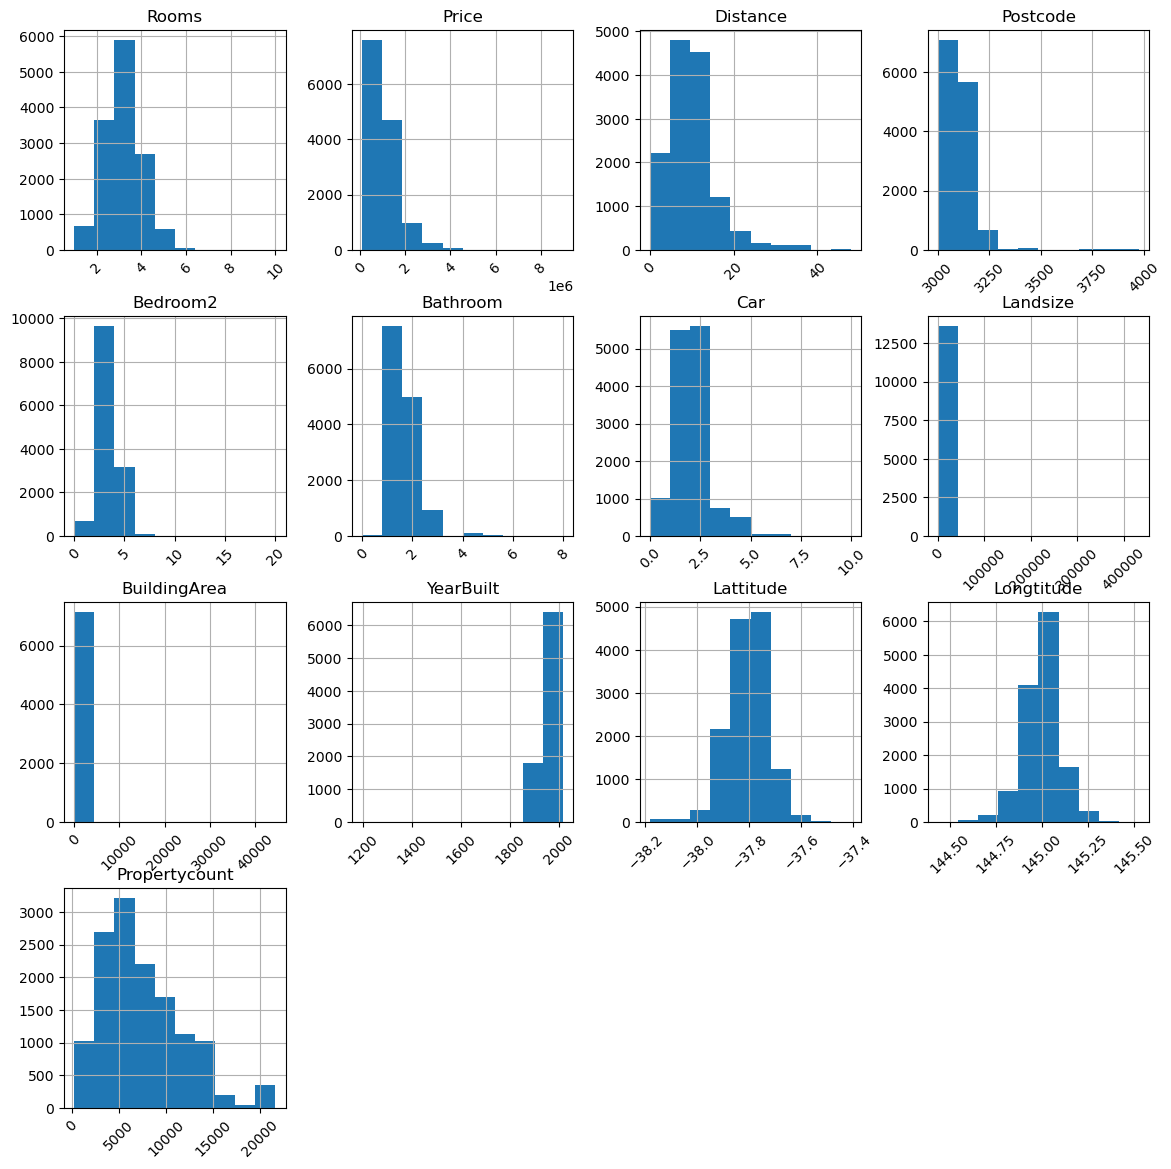

In [11]:
DatosMelbourne.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **BuildingArea** y **LandSize** tienen valores sesgados a la izquierda. La variable **Price** también está sesgada hacia la izquierda. **YearBuilt** está sesgado hacia la derecha y el límite comienza en 1200, lo cual es extraño.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [12]:
a=DatosMelbourne.describe()
a

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [13]:
df=pd.DataFrame()
df["hola"]=None

* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Estos son: **Car**, **Landsize** y **YearBuilt**.

In [14]:
b=a.index.to_list()
df["hola"]=b
df.index=b
df

,hola
count,count
mean,mean
std,std
min,min
25%,25%
50%,50%
75%,75%
max,max


In [15]:
c=pd.concat([df,a], axis=1)
c

,hola,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


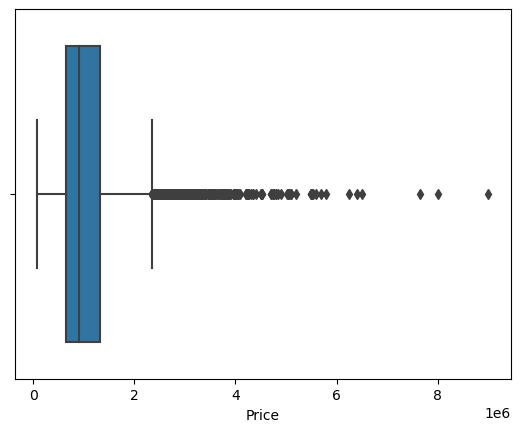

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


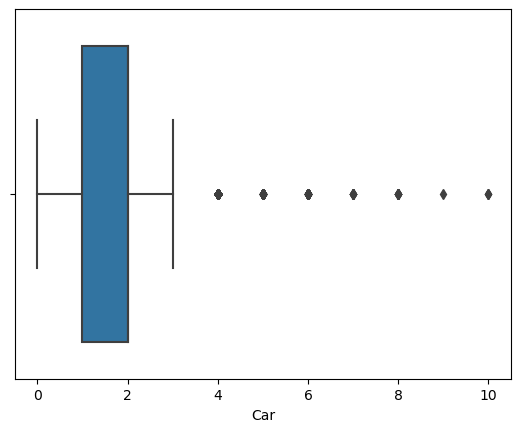

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


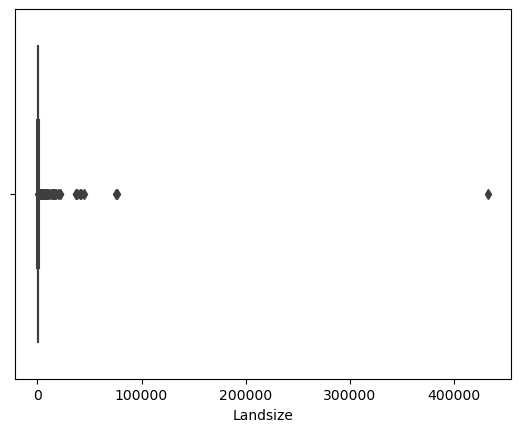

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


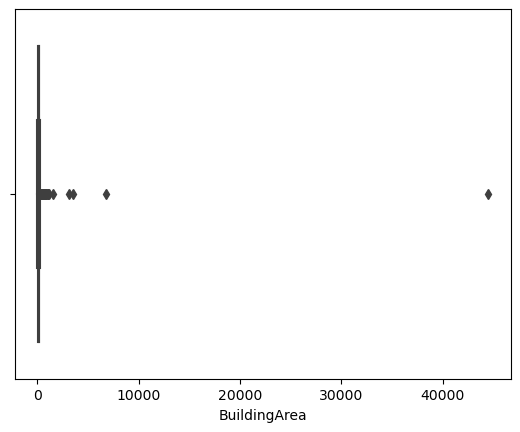

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


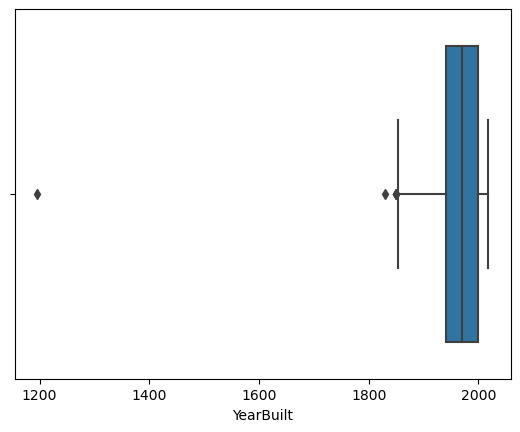

In [16]:
VariablesValoresAtipicos = ['Price', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=DatosMelbourne)
  plt.show()

Se observa que Landsize, Buildingarea y YearBuilt tienen valores atípicos que están lejos de los otros valores.

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [17]:
DatosMelbourne.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que algunas clases tienen demasiados valores únicos, como Address, seguida de Suburb y SellerG. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.
*top -> el elemento que más aparece en la variable

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


[0 1 2 3 4]
[10.00367304 10.42750809 10.09280011  8.66745522 12.77785333]


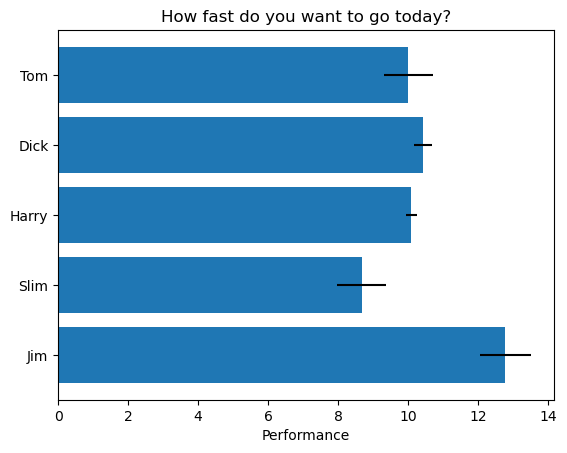

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
print(y_pos)
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
print(performance)
ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

['Type', 'Method', 'Regionname']


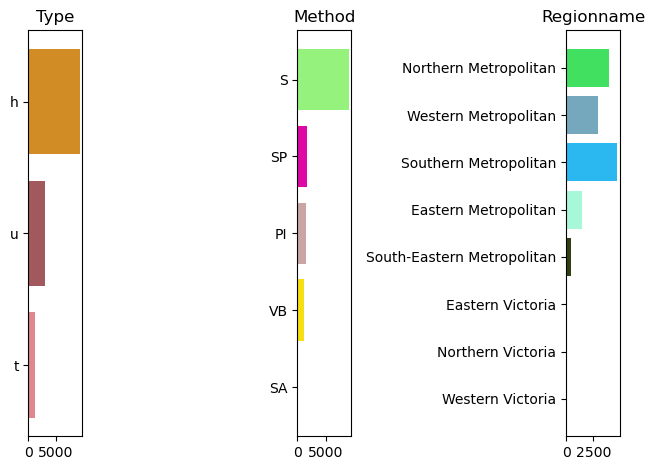

In [20]:
from matplotlib.ticker import ScalarFormatter
import random
import matplotlib.colors as mcolors
varBox=[]
#Gerneación de figura
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique()<10:
    varBox.append(col)
variables=len(varBox)
print(varBox)
copy_df=pd.DataFrame()
for i in varBox:
    copy_df=pd.concat([copy_df,DatosMelbourne[i]], axis=1)
if variables%3 != 0:
    #Numero de variables no es multiplo de 3
    renglones=math.ceil(variables/3)
else:
    #El número de variables si es multiplo de 3
    renglones=variables//3

fig, axs = plt.subplots(nrows=renglones, ncols=3, sharey=False, tight_layout=True, clear=True) 
fig.subplots_adjust(hspace=2, wspace=2)

calses=[]
counts=[]
colores=[]
aux=0
if 0<variables<=3:
    for i in range(variables):
        clases=list(DatosMelbourne[varBox[aux]].unique())
        counts=list(DatosMelbourne[varBox[aux]].value_counts(sort=False))
        for w in range(len(clases)):
            color = [round(random.uniform(0.0,1.0),2) for i in range(0,3)]
            colores.append(color)
        y_pos=list(range(len(clases)))
        axs[i].barh(y_pos, counts, align='center', color=colores)
        axs[i].set_yticks(y_pos, labels=clases)
        axs[i].set_title(varBox[aux])
        axs[i].invert_yaxis()
        axs[i].xaxis.set_major_formatter(ScalarFormatter())
        colores=[]
        aux+=1
else:
    for i in range(renglones):
        for j in range(3):
            if aux <= len(varBox)-1:
                clases=list(DatosMelbourne[varBox[aux]].unique())
                counts=list(DatosMelbourne[varBox[aux]].value_counts(sort=False))
                counts=list(DatosMelbourne[varBox[aux]].value_counts(sort=False))
                for w in range(len(clases)):
                    color = [round(random.uniform(0.0,1.0),2) for i in range(0,3)]
                    colores.append(color)
                y_pos=list(range(len(clases)))
                axs[i,j].barh(y_pos, counts, align='center', color=colores)
                axs[i,j].set_yticks(y_pos, labels=clases)
                axs[i,j].set_title(varBox[aux])
                axs[i,j].invert_yaxis()
                axs[i,j].xaxis.set_major_formatter(ScalarFormatter())
                colores=[]
                aux+=1



In [21]:
import numpy as np
color = list(np.random.choice(range(256), size=3))
print(color)

[250, 69, 48]


In [22]:
print(mcolors.CSS4_COLORS.values())

dict_values(['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3

In [23]:
DatosMelbourne=DatosMelbourne.dropna()

In [24]:
list(DatosMelbourne[varBox[0]].unique())


['h', 'u', 't']

In [25]:
n=list(DatosMelbourne[varBox[0]].value_counts())
n

[4088, 1506, 602]

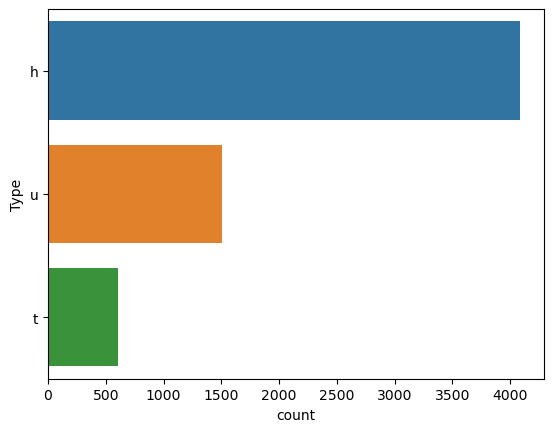

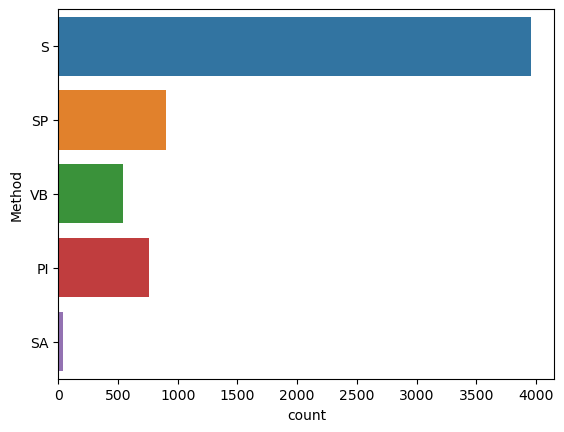

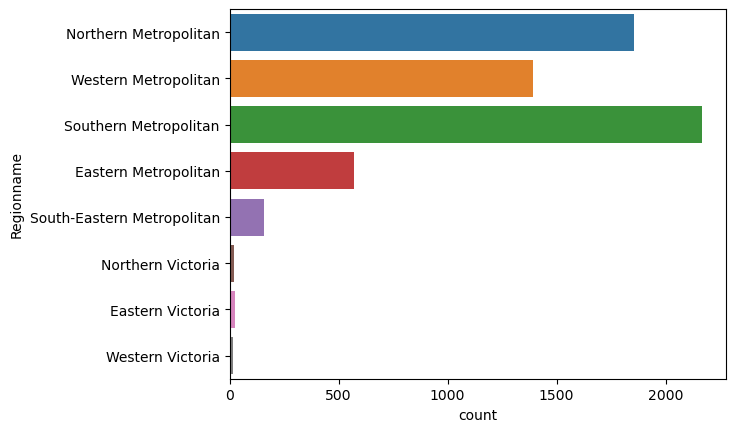

In [26]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique()<10:
    sns.countplot(y=col, data=DatosMelbourne)
  plt.show()

**5) Agrupación por variables categóricas**





In [27]:
for col in DatosMelbourne.select_dtypes(include='object'):
  if DatosMelbourne[col].nunique() < 10:
    display(DatosMelbourne.groupby(col).agg(['mean']))

/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_1255/1420516424.py:3: FutureWarning: ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,
h,3.306262,1.273016e+06,10.574535,3100.993395,3.268836,1.688601,1.745597,513.565802,165.504297,1953.127446,-37.802228,144.989666,7164.280822
t,2.827243,8.841816e+05,9.803821,3094.857143,2.799003,1.797342,1.524917,259.611296,133.089377,1999.790698,-37.809870,144.989328,7101.543189
u,1.955511,5.883745e+05,7.494821,3107.372510,1.947543,1.183267,1.126162,439.984064,79.985359,1979.543825,-37.822527,144.992002,8305.168659


/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_1255/1420516424.py:3: FutureWarning: ['Suburb', 'Address', 'Type', 'SellerG', 'Date', 'CouncilArea', 'Regionname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Method,,,,,,,,,,,,,
PI,3.038309,1.136026e+06,9.153633,3105.718626,3.005284,1.730515,1.649934,503.336856,155.325112,1966.122853,-37.811920,144.998571,7898.820343
S,2.948193,1.087589e+06,10.054081,3103.112459,2.915593,1.546374,1.569623,475.923427,141.866612,1962.450341,-37.807746,144.993410,7409.381097
SA,3.000000,9.523415e+05,11.580488,3134.902439,3.024390,1.756098,1.658537,410.560976,154.072927,1982.170732,-37.809287,144.986721,6504.609756
SP,2.762806,8.754526e+05,9.975835,3092.003341,2.753898,1.488864,1.513363,444.086860,124.410167,1968.309577,-37.802685,144.965539,7237.390869
VB,2.933702,1.167024e+06,7.866298,3102.160221,2.895028,1.710866,1.589319,439.191529,147.651393,1964.769797,-37.811987,144.996192,7377.714549


/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_1255/1420516424.py:3: FutureWarning: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  display(DatosMelbourne.groupby(col).agg(['mean']))


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Regionname,,,,,,,,,,,,,
Eastern Metropolitan,3.327496,1.110341e+06,13.602627,3107.896673,3.306480,1.751313,1.826620,594.992995,163.781664,1971.248687,-37.784350,145.121005,5476.938704
Eastern Victoria,3.478261,6.699992e+05,34.486957,3553.478261,3.478261,1.869565,2.000000,825.695652,185.319565,1980.739130,-37.966744,145.327523,9145.521739
Northern Metropolitan,2.714132,8.722635e+05,7.841424,3069.563107,2.695254,1.398598,1.414779,404.265372,120.903598,1962.208198,-37.749780,144.978651,9443.594930
Northern Victoria,3.473684,5.568947e+05,34.768421,3414.631579,3.473684,1.736842,1.947368,809.263158,157.025263,1981.631579,-37.607324,144.828024,3876.315789
South-Eastern Metropolitan,3.369427,9.304847e+05,23.950955,3221.815287,3.363057,1.668790,1.980892,545.337580,158.982772,1977.273885,-37.994516,145.142413,6455.484076
Southern Metropolitan,2.897969,1.378654e+06,8.725623,3156.991690,2.858264,1.679594,1.547091,475.411819,150.989915,1960.247922,-37.866345,145.034150,7590.471376
Western Metropolitan,3.038075,8.675011e+05,9.747414,3029.372845,3.003592,1.562500,1.661638,481.201149,142.352787,1967.415948,-37.784285,144.867188,5488.101293
Western Victoria,3.571429,3.910714e+05,30.750000,3337.500000,3.571429,1.642857,1.857143,682.214286,148.525714,1982.500000,-37.691194,144.575271,4045.000000


In [38]:
DatosMelbourne.select_dtypes(include='object').columns.to_list()

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [28]:
a=DatosMelbourne.corr()
a

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


<AxesSubplot:>

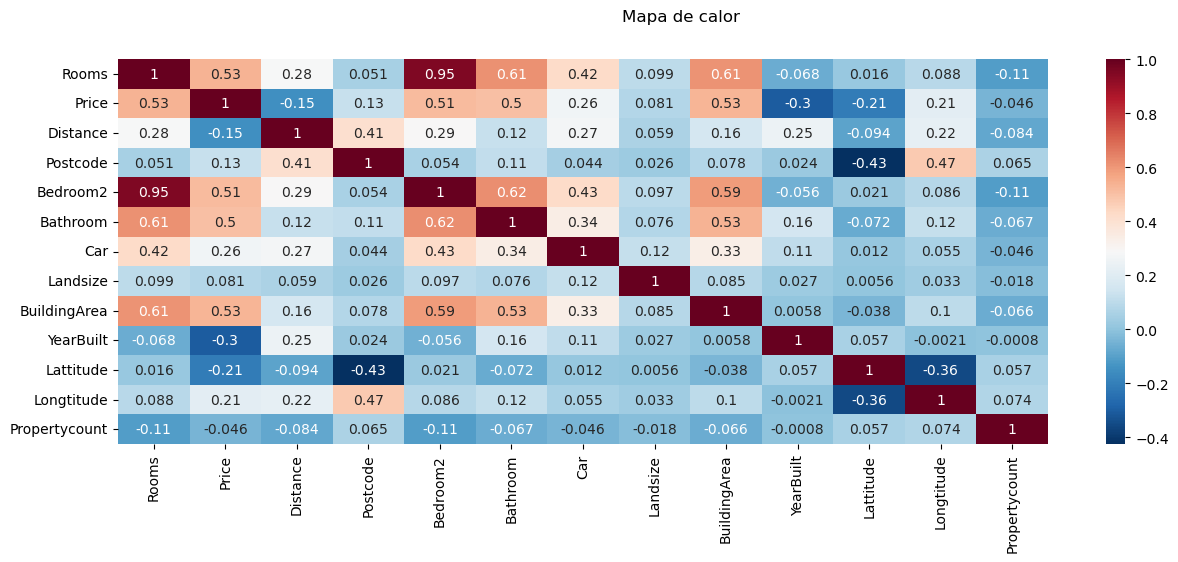

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap

fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Mapa de calor')
sns.heatmap(ax=axes,data=DatosMelbourne.corr(), cmap='RdBu_r', annot=True)

In [29]:
a.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

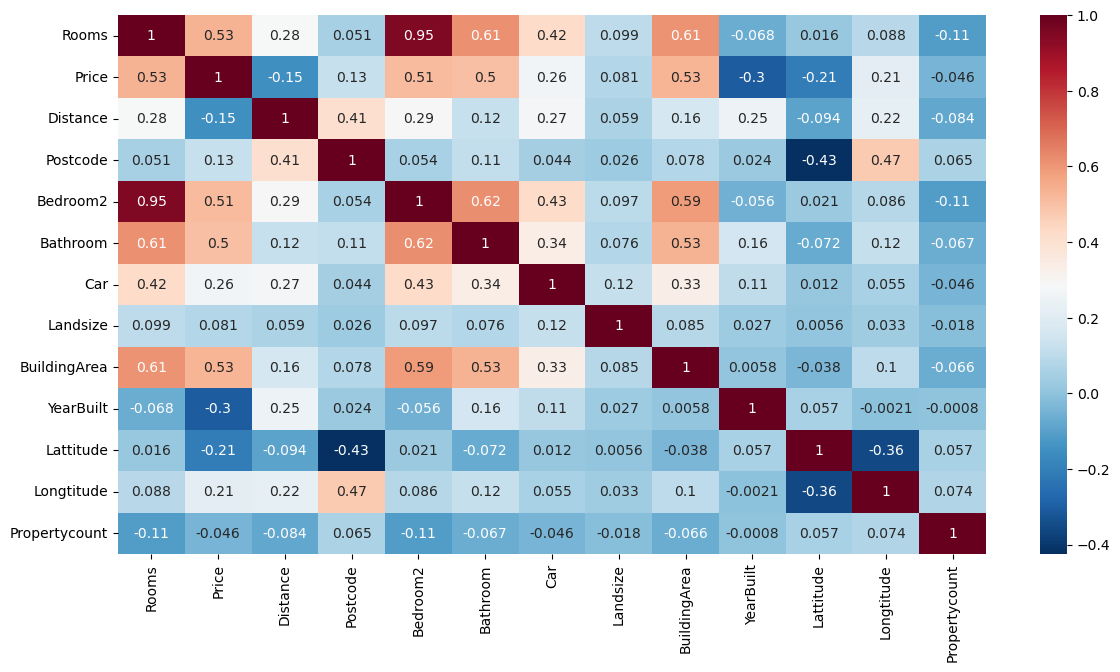

In [30]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True)
plt.show()

*0-0.33 relación baja

*0.34-0.66 relación media

*0.67-1 relación fuerte

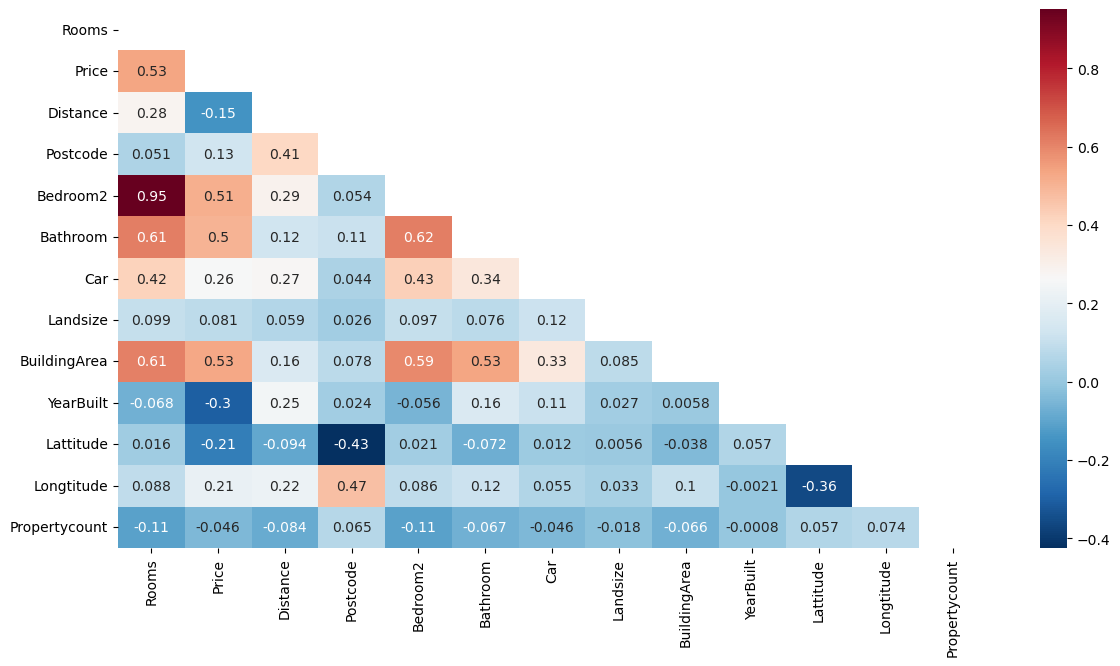

In [31]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosMelbourne.corr())
sns.heatmap(DatosMelbourne.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


Es importante reducir la dimensón de la data. Evitar trabajar con datos redundantes.
En este caso las variables Rooms y Bedroom2 tiene una relación fuerte, esto se debe a la redundancia que hay al tener datos de dos fuentes para la misma variable.

Relaciones fuertes se presentan en datos que dicen lo mismo. Ejemplo la edad y el año de nacimiento. Tienen una relación fuerte porque ambas dicen los mismo.